In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)
### global variable:
g_nucleic_acids_types = ['dsDNA', 'dsRNA', 'ssDNA', 'ssRNA']


param_load = False
data_root = '../data/_datasets/cluster_res'
# data_root = 'data/_datasets/cluster_res'
output_dir = 'out_v01'

# 主要数据
# mainf = 'seq_dg_v02.txt'
mainf = 'seq_dg_v02_1.txt'
wtf = 'wt_v02.tsv'


def createDir(p):
  if not os.path.exists(p):
    print("Directory {} doesn't exist, create a new.".format(p))
    os.makedirs(p)

output_dir = os.path.join(data_root, output_dir)
createDir(output_dir)

# mutation_type
# exp_id, key_complex
# protein_index, key_nucleic_acids
# protein_sequence nucleotide_sequence dG 
list_cols = ['exp_id', 'key_complex', 'UniProt', 'protein_sequence', 'nucleotide_sequence', 
             'nucleic_acid_type_new', 'dG', 'dG_ori', 'key_nucleic_acids', 'protein_index',
            'wt_complex','pclass','nuclass','base_class','avg_dist_to_others']
mainf = os.path.join(data_root, mainf)
madf = pd.read_csv(mainf, sep='\t', low_memory=False, usecols=list_cols)
print(len(madf))
madf.head(3)
# wtf = os.path.join(data_root, wtf)
# wtdf = pd.read_csv(wtf, sep='\t', low_memory=False)
# print(len(wtdf))


17199


,exp_id,key_complex,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_type_new,dG,dG_ori,protein_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,0,0,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,ssDNA,-8.79,-8.79,protein_6,Single_DNA_0,True,PCluster_445,SDNACluster_1394,SDNACluster_1394-PCluster_445,3.384718
1,1,1,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,ssDNA,-7.83,-7.83,protein_12,Single_DNA_1,True,PCluster_446,SDNACluster_1441,SDNACluster_1441-PCluster_446,3.386447
2,2,2,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,ssDNA,-7.99,-7.99,protein_12,Single_DNA_2,True,PCluster_446,SDNACluster_1441,SDNACluster_1441-PCluster_446,3.386447


In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)
### global variable:
g_nucleic_acids_types = ['dsDNA', 'dsRNA', 'ssDNA', 'ssRNA']


param_load = False
data_root = '../data/tmp_data/train'
mainf = 'train.csv'


list_cols = ['exp_id', 'key_complex', 'UniProt', 'protein_sequence', 'nucleotide_sequence', 
             'nucleic_acid_type_new', 'dG', 'dG_ori', 'key_nucleic_acids', 'protein_index',
            'wt_complex','pclass','nuclass','base_class','avg_dist_to_others']
mainf = os.path.join(data_root, mainf)
madf = pd.read_csv(mainf, sep='\t', low_memory=False, usecols=list_cols)
print(len(madf))
madf.head(3)



5177


,exp_id,key_complex,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_type_new,dG,dG_ori,protein_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,10,10,P17676,MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCLAAAYGGKAAP...,TATATTGCGCAATATA,ssDNA,-10.42,-10.42,protein_17,Single_DNA_10,True,PCluster_451,SDNACluster_1115,SDNACluster_1115-PCluster_451,3.749697
1,12,12,P23909,MSAIENFDAHTPMMQQYLRLKAQHPEILLFYRMGDFYELFYDDAKR...,AAAGCTGGAGCTGAAGCTTAGCTTAGGATCATCGAGGATCGAGCTC...,ssDNA,-9.49,-9.49,protein_19,Single_DNA_12,True,PCluster_453,SDNACluster_204,SDNACluster_204-PCluster_453,3.586935
2,15,15,O95243,MGTTGLESLSLGDRGAAPTVTSSERLVPDPPNDLRKEDVAMELERV...,GAGGCGCTCGGCGGCAG,ssDNA,-6.50,-6.50,protein_22,Single_DNA_15,True,PCluster_456,SDNACluster_981,SDNACluster_981-PCluster_456,3.622835


In [47]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, MeanShift, DBSCAN, OPTICS


X = madf['dG'].values
X = X.reshape(-1,1)
model = KMeans(n_clusters=8)
# model = MeanShift()

# 模型拟合
model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)

Xgroups = []
bin_info = dict()
for cluster in clusters:
#     row_ix = where(yhat == cluster)
#     Xgroups.append(X[row_ix])
#     cur_x = X[row_ix]
#     print("{:.1f}  {:.1f} - {:.1f}  {}".format( cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x) ))
    row_ix = np.where(yhat == cluster)
    cur_x = X[row_ix]
    # cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x)
    bin_info[cur_x.mean()] = ( cur_x.max(), cur_x.min(), len(cur_x) )
    print("{:.1f} : ({:.1f}, {:.1f}, {})".format( cur_x.mean(), cur_x.max(), cur_x.min(), len(cur_x) ))
bin_info

-14.8 : (-13.8, -24.4, 109)
-7.5 : (-6.6, -8.3, 942)
-11.3 : (-10.7, -12.1, 973)
-5.7 : (-3.6, -6.6, 357)
-9.0 : (-8.3, -9.6, 1178)
-12.8 : (-12.1, -13.8, 431)
-1.3 : (-0.0, -2.9, 37)
-10.2 : (-9.6, -10.7, 1150)


/home/megvii/anaconda3/envs/paul-py3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{-14.835086763451287: (-13.82, -24.42, 109),
 -7.543297859164897: (-6.62, -8.3, 942),
 -11.317045438530975: (-10.745, -12.05, 973),
 -5.668508803521409: (-3.56, -6.615, 357),
 -9.045142712291481: (-8.31, -9.605, 1178),
 -12.78339212870843: (-12.0525, -13.8, 431),
 -1.324189189189189: (-0.01, -2.85, 37),
 -10.15739552167639: (-9.61, -10.74, 1150)}

In [51]:
import torch
import torch.nn as nn
x = torch.rand(2, 2, 32)
layer_norm = nn.BatchNorm1d(32)
# isinstance(layer_norm, nn.BatchNorm1d)
layer_norm(x).shape

RuntimeError: running_mean should contain 2 elements not 32

In [43]:
list_ctr = []
list_half_w = []
for k, v in bin_info.items():
    mean_x = k
    max_x, min_x, len_x = v
    ctr = (max_x + min_x) / 2.0
    half_w = np.abs(max_x - min_x) / 2.0
    list_ctr.append(ctr)
    list_half_w.append(half_w)
    
bin_ctrs = np.array(list_ctr) # (n_bins, )
bin_half_w = np.array(list_half_w) # (n_bins, )

bin_ctrs, bin_half_w

(array([ -8.7975, -12.8825,  -7.32  , -11.295 ,  -5.0175, -19.11  ,
         -1.43  , -10.0225]),
 array([0.6375, 0.8925, 0.83  , 0.685 , 1.4575, 5.31  , 1.42  , 0.5825]))

In [44]:
sorted_ids = np.argsort(bin_ctrs)
bin_ctrs = bin_ctrs[sorted_ids]
bin_half_w = bin_half_w[sorted_ids]

bin_ctrs, bin_half_w

(array([-19.11  , -12.8825, -11.295 , -10.0225,  -8.7975,  -7.32  ,
         -5.0175,  -1.43  ]),
 array([5.31  , 0.8925, 0.685 , 0.5825, 0.6375, 0.83  , 1.4575, 1.42  ]))

-24.42 -0.01


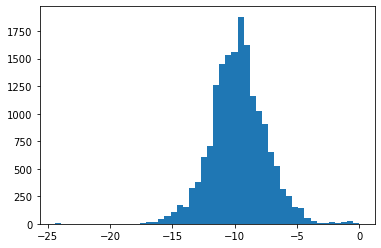

In [7]:
# madf.hist(column='dG')
dgs = madf['dG'].values
print(dgs.min(), dgs.max())
out = plt.hist(dgs, bins=50)

In [8]:
bins = []
bins.append([-24., 4])
bins.append([-20., 4])
bins.append([-17., 2])
# (-16.5, 1) -> (-4.5, 1)
for x in np.arange(-16.5, -3.5, 1):
  bins.append([x, 1])
bins.append([-3., 2])
bins.append([-1., 2])
num_bins = len(bins)
num_bins

18

In [12]:
np.arange(-15, -5, 2)

array([-15, -13, -11,  -9,  -7])

In [10]:
szs, bins,_ = out
for i in range(len(szs)-1):
    print("{} {:.2f} ~ {:.2f}  {:.2f}".format(int(szs[i]), bins[i], bins[i+1], bins[i+1]-bins[i]))

3 -24.42 ~ -23.93  0.49
0 -23.93 ~ -23.44  0.49
0 -23.44 ~ -22.96  0.49
0 -22.96 ~ -22.47  0.49
0 -22.47 ~ -21.98  0.49
0 -21.98 ~ -21.49  0.49
2 -21.49 ~ -21.00  0.49
0 -21.00 ~ -20.51  0.49
0 -20.51 ~ -20.03  0.49
0 -20.03 ~ -19.54  0.49
0 -19.54 ~ -19.05  0.49
0 -19.05 ~ -18.56  0.49
0 -18.56 ~ -18.07  0.49
2 -18.07 ~ -17.59  0.49
5 -17.59 ~ -17.10  0.49
12 -17.10 ~ -16.61  0.49
13 -16.61 ~ -16.12  0.49
44 -16.12 ~ -15.63  0.49
75 -15.63 ~ -15.14  0.49
108 -15.14 ~ -14.66  0.49
171 -14.66 ~ -14.17  0.49
154 -14.17 ~ -13.68  0.49
329 -13.68 ~ -13.19  0.49
381 -13.19 ~ -12.70  0.49
605 -12.70 ~ -12.22  0.49
704 -12.22 ~ -11.73  0.49
1258 -11.73 ~ -11.24  0.49
1449 -11.24 ~ -10.75  0.49
1531 -10.75 ~ -10.26  0.49
1561 -10.26 ~ -9.77  0.49
1881 -9.77 ~ -9.29  0.49
1626 -9.29 ~ -8.80  0.49
1157 -8.80 ~ -8.31  0.49
1021 -8.31 ~ -7.82  0.49
904 -7.82 ~ -7.33  0.49
649 -7.33 ~ -6.84  0.49
524 -6.84 ~ -6.36  0.49
320 -6.36 ~ -5.87  0.49
255 -5.87 ~ -5.38  0.49
152 -5.38 ~ -4.89  0.49
145 -4.

In [ ]:
def do_group(target_ids, mapping, output):
    print("do")
    dgs = np.array([dg for dg, cid in zip(mapping["dg"], mapping["complex_ids"]) if cid in target_ids])
    cids = np.array([cid for cid in mapping["complex_ids"] if cid in target_ids])
    assert(len(dgs) == len(cids))
    if len(dgs) == 0:
        return
    
    id_max = np.argmax(dgs)
    id_min = np.argmin(dgs)
    ids_group1 = np.where(dgs[id_max] - dgs < 1.0)[0]
    ids_group2 = np.where(dgs - dgs[id_min] < 1.0)[0]
    print(cids)
    cids_group1 = cids[ids_group1]
    cids_group2 = cids[ids_group2]
    output.append({'cids': cids_group1, 'dgs': dgs[ids_group1]})
    output.append({'cids': cids_group2, 'dgs': dgs[ids_group2]})
    
    # compute other_ids with cids_group1 and cids_group2
    mark = np.logical_and(dgs[id_max] - dgs >= 1.0, dgs - dgs[id_min] >= 1.0)
    other_ids = np.where(mark)
    other_cids = cids[other_ids]
    
    if len(other_ids) > 0:
        do_group(other_cids, mapping, output)
    

cids = cluster2info['cluster_pair_1787']['complex_ids']
print(len(cids))
mapping = cluster2info['cluster_pair_1787']
groups = []
do_group(cids, mapping, groups)
print(groups, sum([len(x) for x in groups]))

In [30]:
def valueCluster(d, xs, ids, out):
    if len(xs) == 0:
        return
    x_max = xs.max()
    mask = np.abs(x_max - xs) < d
    pos_ids = np.where(mask)[0]
    neg_ids = np.where(~mask)[0]
    out.append(ids[pos_ids])
    valueCluster(d, xs[neg_ids], ids[neg_ids], out)

out = []
xs = np.array([ -9.54, -12.13, -4.6, -12.13, -9.54, -6])
ids = np.arange(len(xs))
valueCluster(1.0, xs, ids, out)
out

[array([2]), array([5]), array([0, 4]), array([1, 3])]

In [32]:
def f(d):
    return np.max(d, 2.0)

remain_idxs = []
for k, sdf in madf.groupby('key_complex'):
    if len(sdf) <= 1:
        continue
    ref_dgs = sdf['dG'].values
    idx = sdf['dG_ori'].index
    dgs = sdf['dG_ori'].values
    if np.abs(dgs.max() - dgs.min()) < 0.5:
        continue
    diffs = np.abs(dgs - ref_dgs)
    if diffs.max() < 0.5:
        continue
    # z_score = (x - mean) / std
    # zsc = np.abs( (dgs - dgs.mean()) / dgs.var() )
    
    rem_ids = np.where(diffs < 2.0)[0]
    if len(rem_ids) == 0:
#         print(ref_dgs[0], dgs)
        out = []
        ids = np.arange(len(dgs))
        valueCluster(2.0, dgs, ids, out)
        ts = [i for i, x in enumerate(out) if len(x) == 1]
        remove = False
        if len(ts) == 1:
            t = ts[0]
            for g in out:
                if len(g) > 1:
                    if np.abs(dgs[g].mean() - dgs[t]) > 5.0:
                        remove = True
        if remove:
            gs = [x for x in out if len(x) != 1]
            gs = np.concatenate(gs)
            idx = idx[gs]
            dgs = dgs[gs]
        print(dgs)
    else:
        idx = idx[rem_ids]
        dgs = dgs[rem_ids]
        remain_idxs.append(idx)
#     print(dgs)



[-20.02 -20.01 -14.9  -14.89]
[-10.81  -6.71]
[-10.37  -6.28]
[-11.63  -7.53]
[-10.6  -6.5]
[-10.86  -6.76]
[-11.4  -7.3]
[-4.7  -8.96]
[-13.87  -5.14  -5.18]
[-12.69  -8.51]
[-11.07  -4.85]
[-13.76  -9.6 ]
[-15.    -9.54]
[ -9.54 -14.94]
[-15.25  -9.54]
[-14.37  -9.54]
[-16.01  -9.54]
[ -8.65 -12.78]
[ -7.23 -12.78]
[ -8.41 -12.78]
[-17.43 -12.04]
[ -7.72 -11.84  -7.71 -11.83]
[ -7.18 -11.26  -7.17 -11.25]
[-9.68 -4.39]
[-11.31  -7.  ]
[-11.31  -7.  ]
[-13.32  -6.41]
[-9.35 -4.51]
[ -6.28 -10.45]
[-14.16  -9.54]
[ -9.54 -13.7 ]
[-14.37  -9.54]
[ -9.54 -14.31]
[ -9.54 -13.85]
[-14.84  -6.9 ]
[ -6.65 -12.15]
[ -6.65 -10.69]
[ -6.65 -10.9   -6.64 -10.89]
[-9.65 -4.5 ]
[-8.85 -4.58]
[-8.85 -4.58]
[-0.06 -9.07]
[-0.06 -9.07]
[-0.13 -9.15]
[-0.13 -9.15]
[-0.21 -9.24]
[-0.13 -9.15]
[-0.13 -9.15]
[ -7.9  -12.23]
[ -6.12 -12.23]
[ -7.9  -12.23]
[ -7.91 -12.23]
[ -9.31 -15.92]
[-10.54 -15.92]
[-14.08  -8.94]
[-11.15  -7.11]
[-10.41 -17.46 -11.01 -16.91]
[ -7.94 -12.2   -7.94 -12.2 ]
[-7.26 -0.9

(array([3.77358491, 3.77358491]), array([-7.9 , -7.37]))

In [70]:
bins = []
bins.append([-24., 4])
bins.append([-20., 4])
bins.append([-17., 2])
# (-16.5, 1) -> (-4.5, 1)
for x in np.arange(-16.5, -3.5, 1):
  bins.append([x, 1])
bins.append([-3., 2])
bins.append([-1., 2])
num_bins = len(bins)
bin_ctrs = np.array([x[0] for x in bins])
bin_half_widths = np.array([x[1]/2.0 for x in bins])

bin_ctrs2= np.array([bin_ctrs, bin_ctrs])
print(bin_ctrs2.shape)
bin_ctrs2 = torch.tensor(bin_ctrs2, dtype=torch.float32)
bin_ctrs2

(2, 18)


tensor([[-24.0000, -20.0000, -17.0000, -16.5000, -15.5000, -14.5000, -13.5000,
         -12.5000, -11.5000, -10.5000,  -9.5000,  -8.5000,  -7.5000,  -6.5000,
          -5.5000,  -4.5000,  -3.0000,  -1.0000],
        [-24.0000, -20.0000, -17.0000, -16.5000, -15.5000, -14.5000, -13.5000,
         -12.5000, -11.5000, -10.5000,  -9.5000,  -8.5000,  -7.5000,  -6.5000,
          -5.5000,  -4.5000,  -3.0000,  -1.0000]])

In [77]:
x.shape[0]

2

In [75]:
x = torch.tensor([0,1])
y = torch.tensor([1,2])
bin_ctrs2[x,y]

tensor([-20., -17.])

In [59]:
import torch
import torch.nn.functional as F

scores = torch.rand(3, 5)
probs = F.softmax(scores, dim=-1)
print(probs)
ids = torch.argmax(probs, dim=-1, keepdim=False) 
ids

tensor([[0.1272, 0.1978, 0.2574, 0.1482, 0.2695],
        [0.2100, 0.2182, 0.2004, 0.2015, 0.1698],
        [0.2951, 0.1459, 0.2028, 0.1923, 0.1639]])


tensor([4, 1, 0])